## Expectation Maximization
##### Jessica Morrise

In [326]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import seaborn
import pylab

**The problem**: We have three coins, coin 1, coin 2, and coin 3, which come up heads with probabilities $\lambda$, $p_1$, and $p_2$, respectively. We generate data as follows. First, flip coin 1 once. If coin 1 is heads, flip coin 2 three times and report the outcome. If coin 1 is tails, flip coin 3 three times and report the outcome. The outcome of coin 1 is never reported - only those for coins 2 and 3.

How can we recover the parameters $\lambda$, $p_1$, and $p_2$ given only the observed data? It turns out that the expectation maximization algorithm will converge to the right parameters, given a reasonable initial guess.

To start the EM algorithm, we begin by choosing our actual values for $\lambda$, $p_1$, and $p_2$. These are the values that the algorithm will attempt to estimate.

In [492]:
L_actual = 0.7
p1_actual = 0.75
p2_actual = 0.31

We set up functions to generate data, then simulate 1000 data points. The histogram below shows the frequency in our simulated data of 0, 1, 2 and 3 heads.

In [493]:
def flip(p):
    return int(np.random.rand()<p)

def generate_data(n):
    data = np.empty((n,3))
    for i in xrange(n):
        if flip(L_actual):
            data[i,:] = np.array([flip(p1_actual) for j in xrange(3)])
        else:
            data[i,:] = np.array([flip(p2_actual) for j in xrange(3)])
    return data

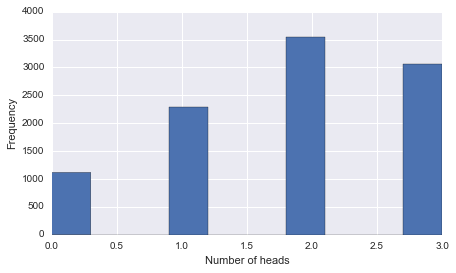

In [494]:
#Generate some data
trials = 10000
data = generate_data(trials)

pylab.rcParams['figure.figsize'] = (7.0,4.0)
plt.hist(data.sum(axis=1))
plt.xlabel('Number of heads')
plt.ylabel('Frequency')
plt.show()

### EM Algorithm
We now use the expectation maximiation algorithm to estimate the values of $\lambda$, and $p_1$, $p_2$. The function below performs a single iteration of the algorithm and returns the updated values of the parameters. 

In [495]:
def iterate_parameters(L,p1,p2,D):
    #set up prior probabilities
    probs1 = np.empty(4)
    probs1[3] = L*p1**3 #probability of getting 3 heads on coin 1
    probs1[2] = L*(p1**2)*(1-p1) #probability of getting 2 heads on coin 1
    probs1[1] = L*p1*(1-p1)**2
    probs1[0] = L*(1-p1)**3

    probs2 = np.empty((4))
    probs2[3] = (1-L)*p2**3
    probs2[2] = (1-L)*(p2**2)*(1-p2)
    probs2[1] = (1-L)*p2*(1-p2)**2
    probs2[0] = (1-L)*(1-p2)**3

    lambda_probs_H = probs1/(probs1+probs2) #lambda_probs_H[3] = probability that L=H given that we saw 3 heads
    lambda_probs_T = probs2/(probs1+probs2)
    
    #count data
    N = D.shape[0]
    D_counts = data_counts(D.sum(axis=1))
    
    #compute new parameters
    L_new = np.sum(lambda_probs_H*D_counts)/N
    p1_new = np.sum(lambda_probs_H*D_counts*np.array([0.,1.,2.,3.]))/np.sum(lambda_probs_H*D_counts*3.)
    p2_new = np.sum(lambda_probs_T*D_counts*np.array([0.,1.,2.,3.]))/np.sum(lambda_probs_T*D_counts*3.)  
    
    return L_new,p1_new,p2_new

def data_counts(_data):
    return [_data[_data==k].size for k in xrange(4)]

Below we run the actual algorithm. We use the data generated above. The initial values of the parameters are guesses based on some prior knowledge or intuition about the data.

In [496]:
#Prior parameters
L = 0.5
p1 = 0.505
p2 = 0.5
print "Actual\nL = %.5f\tp1 = %.5f\tp2 = %.5f\n"%(L_actual,p1_actual,p2_actual)
print "EM\n0\tL = %.5f\tp1 = %.5f\tp2 = %.5f"%(L,p1,p2)

#number of times to iterate the parameters
n_iters = 100 
L_array = [L]   #list to store L for plotting
p1_array = [p1] #to store p1
p2_array = [p2] #to store p2
for i in xrange(1,n_iters):
    L,p1,p2 = iterate_parameters(L,p1,p2,data)
    if i%10 == 0:
        print "%d\tL = %.5f\tp1 = %.5f\tp2 = %.5f"%(i,L,p1,p2)
    L_array.append(L)
    p1_array.append(p1)
    p2_array.append(p2)
    
print "\nFinal Result\nL = %.5f\tp1 = %.5f\tp2 = %.5f"%(L,p1,p2)

Actual
L = 0.70000	p1 = 0.75000	p2 = 0.31000

EM
0	L = 0.50000	p1 = 0.50500	p2 = 0.50000
10	L = 0.50193	p1 = 0.66587	p2 = 0.56983
20	L = 0.52403	p1 = 0.80608	p2 = 0.41100
30	L = 0.54932	p1 = 0.80101	p2 = 0.39501
40	L = 0.57197	p1 = 0.79360	p2 = 0.38343
50	L = 0.59217	p1 = 0.78706	p2 = 0.37260
60	L = 0.60997	p1 = 0.78134	p2 = 0.36264
70	L = 0.62550	p1 = 0.77636	p2 = 0.35360
80	L = 0.63891	p1 = 0.77206	p2 = 0.34550
90	L = 0.65041	p1 = 0.76836	p2 = 0.33834

Final Result
L = 0.65930	p1 = 0.76550	p2 = 0.33266


Plot the estimated and actual values of $\lambda$, and $p_1$, $p_2$ vs. the iteration number.

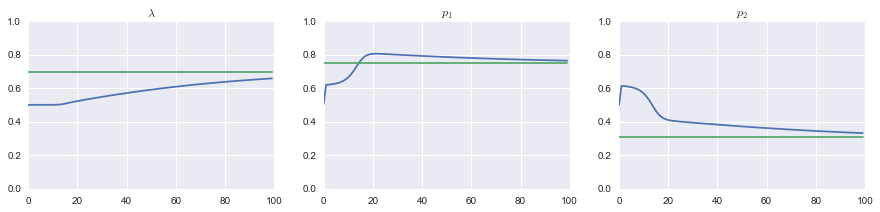

In [497]:
#Plot results
pylab.rcParams['figure.figsize'] = (15.0,3.0)

domain = np.arange(n_iters)
plt.subplot(1,3,1)
plt.plot(domain,L_array, domain,np.ones(n_iters)*L_actual)
plt.ylim([0,1])
plt.title('$\lambda$')

plt.subplot(1,3,2)
plt.plot(domain,p1_array, domain,np.ones(n_iters)*p1_actual)
plt.ylim([0,1])
plt.title('$p_1$')

plt.subplot(1,3,3)
plt.plot(domain,p2_array, domain,np.ones(n_iters)*p2_actual)
plt.ylim([0,1])
plt.title('$p_2$')

plt.show()